In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
covid = pd.read_csv('covid(1).csv',index_col=0)


In [4]:
# covid = covid.replace({'Data Data missing':np.nan, 'Data missing':np.nan})
covid.isnull().any()


sex               False
patient_type      False
entry_date        False
date_symptoms     False
date_died         False
intubed           False
pneumonia         False
age               False
diabetes          False
hypertension      False
other_disease     False
cardiovascular    False
obesity           False
tobacco           False
covid_res         False
icu               False
age_group         False
dtype: bool

In [5]:
covid.head()


,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,diabetes,hypertension,other_disease,cardiovascular,obesity,tobacco,covid_res,icu,age_group
id,,,,,,,,,,,,,,,,,
16169f,Male,Outpatient,4/5/2020,2/5/2020,9999-99-99,Data Data missing,No,27,No,No,No,No,No,No,Positive,Data missing,20-30
1009bf,Male,Outpatient,19-03-2020,17-03-2020,9999-99-99,Data missing,No,24,No,No,No,No,No,No,Positive,Data missing,20-30
167386,Female,Inpatient,6/4/2020,1/4/2020,9999-99-99,No,No,54,No,No,No,No,Yes,No,Positive,No,50-60
0b5948,Male,Inpatient,17-04-2020,10/4/2020,9999-99-99,No,Yes,30,No,No,No,No,No,No,Positive,No,20-30
0d01b5,Female,Inpatient,13-04-2020,13-04-2020,22-04-2020,No,No,60,Yes,Yes,No,Yes,No,No,Positive,No,50-60


In [6]:
#1
covidp = covid[covid['covid_res']=='Positive']
covidp.groupby(['age_group','sex'])['covid_res'].count()

age_group  sex   
20-30      Female    16702
           Male      17227
30-40      Female    22938
           Male      26382
40-50      Female    22355
           Male      27083
50-60      Female    17075
           Male      22862
60-70      Female    10026
           Male      13972
70-80      Female     5061
           Male       7166
< 20       Female     3420
           Male       3415
> 80       Female     2281
           Male       2692
Name: covid_res, dtype: int64

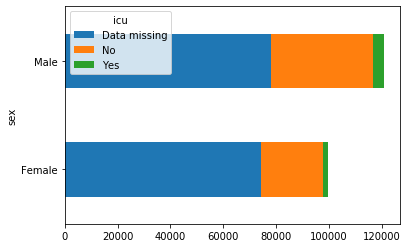

In [7]:
#2
covid = pd.read_csv('covid(1).csv',index_col=0)

p2=pd.crosstab(covidp['sex'],covidp['icu'])
p2.plot.barh(stacked=True)


In [8]:
(p2.loc['Male']['Yes'])/(p2.loc['Male']['Yes']+ p2.loc['Male']['No'])


0.09131085441706029

In [9]:
(p2.loc['Female']['Yes'])/(p2.loc['Female']['Yes']+ p2.loc['Female']['No'])


0.0753419273699104

In [10]:
#3
import warnings
warnings.filterwarnings('ignore')
q3=covidp[covidp['date_died']!='9999-99-99']
q3['date_died']=pd.to_datetime(q3['date_died'])
q3['date_died'].dtype




dtype('<M8[ns]')

In [11]:
covidp['entry_date'] = pd.to_datetime(covidp['entry_date'], dayfirst=True)
covidp

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,diabetes,hypertension,other_disease,cardiovascular,obesity,tobacco,covid_res,icu,age_group
id,,,,,,,,,,,,,,,,,
16169f,Male,Outpatient,2020-05-04,2/5/2020,9999-99-99,Data Data missing,No,27,No,No,No,No,No,No,Positive,Data missing,20-30
1009bf,Male,Outpatient,2020-03-19,17-03-2020,9999-99-99,Data missing,No,24,No,No,No,No,No,No,Positive,Data missing,20-30
167386,Female,Inpatient,2020-04-06,1/4/2020,9999-99-99,No,No,54,No,No,No,No,Yes,No,Positive,No,50-60
0b5948,Male,Inpatient,2020-04-17,10/4/2020,9999-99-99,No,Yes,30,No,No,No,No,No,No,Positive,No,20-30
0d01b5,Female,Inpatient,2020-04-13,13-04-2020,22-04-2020,No,No,60,Yes,Yes,No,Yes,No,No,Positive,No,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27424,Female,Inpatient,2020-06-10,8/6/2020,10/6/2020,No,Yes,88,Yes,Yes,No,No,No,No,Positive,No,> 80
12ed19,Female,Outpatient,2020-06-11,1/6/2020,9999-99-99,Data missing,No,30,No,No,No,No,No,No,Positive,Data missing,20-30
6.60E+43,Female,Outpatient,2020-06-11,10/6/2020,9999-99-99,Data missing,No,27,No,No,No,No,No,No,Positive,Data missing,20-30


In [12]:
covidp['date_symptoms'] = pd.to_datetime(covidp['date_symptoms'], dayfirst=True)
covidp

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,diabetes,hypertension,other_disease,cardiovascular,obesity,tobacco,covid_res,icu,age_group
id,,,,,,,,,,,,,,,,,
16169f,Male,Outpatient,2020-05-04,2020-05-02,9999-99-99,Data Data missing,No,27,No,No,No,No,No,No,Positive,Data missing,20-30
1009bf,Male,Outpatient,2020-03-19,2020-03-17,9999-99-99,Data missing,No,24,No,No,No,No,No,No,Positive,Data missing,20-30
167386,Female,Inpatient,2020-04-06,2020-04-01,9999-99-99,No,No,54,No,No,No,No,Yes,No,Positive,No,50-60
0b5948,Male,Inpatient,2020-04-17,2020-04-10,9999-99-99,No,Yes,30,No,No,No,No,No,No,Positive,No,20-30
0d01b5,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,Yes,Yes,No,Yes,No,No,Positive,No,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27424,Female,Inpatient,2020-06-10,2020-06-08,10/6/2020,No,Yes,88,Yes,Yes,No,No,No,No,Positive,No,> 80
12ed19,Female,Outpatient,2020-06-11,2020-06-01,9999-99-99,Data missing,No,30,No,No,No,No,No,No,Positive,Data missing,20-30
6.60E+43,Female,Outpatient,2020-06-11,2020-06-10,9999-99-99,Data missing,No,27,No,No,No,No,No,No,Positive,Data missing,20-30


In [13]:
covidp=covidp[covidp['date_died']!='9999-99-99']
covidp['date_died'] = pd.to_datetime(covidp['date_died'], dayfirst=True)


In [14]:
covidp.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,diabetes,hypertension,other_disease,cardiovascular,obesity,tobacco,covid_res,icu,age_group
id,,,,,,,,,,,,,,,,,
0d01b5,Female,Inpatient,2020-04-13,2020-04-13,2020-04-22,No,No,60,Yes,Yes,No,Yes,No,No,Positive,No,50-60
1beec8,Male,Inpatient,2020-04-16,2020-04-16,2020-04-29,No,Yes,47,Yes,No,No,No,No,No,Positive,Yes,40-50
008b81,Female,Outpatient,2020-05-15,2020-05-06,2020-05-21,Data missing,No,61,No,Yes,No,No,No,No,Positive,Data missing,60-70
17394f,Male,Inpatient,2020-04-27,2020-04-27,2020-04-28,No,Yes,77,No,Yes,No,No,No,No,Positive,No,70-80
006ddc,Female,Inpatient,2020-04-26,2020-04-23,2020-04-26,No,Yes,53,Yes,No,No,No,Yes,No,Positive,No,50-60


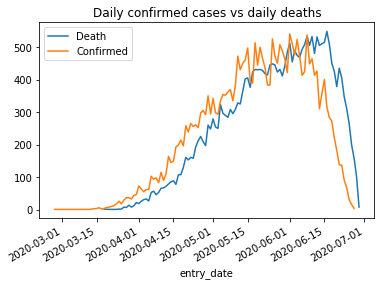

In [15]:
c1=covidp.groupby('date_died')['date_died'].count().plot.line(legend='Death')

c1=covidp.groupby('entry_date')['entry_date'].count().plot.line(legend='Positive')

c1.set_title('Daily confirmed cases vs daily deaths')
c1.legend(['Death','Confirmed'])


Text(0.5, 1.0, 'Daily Death')

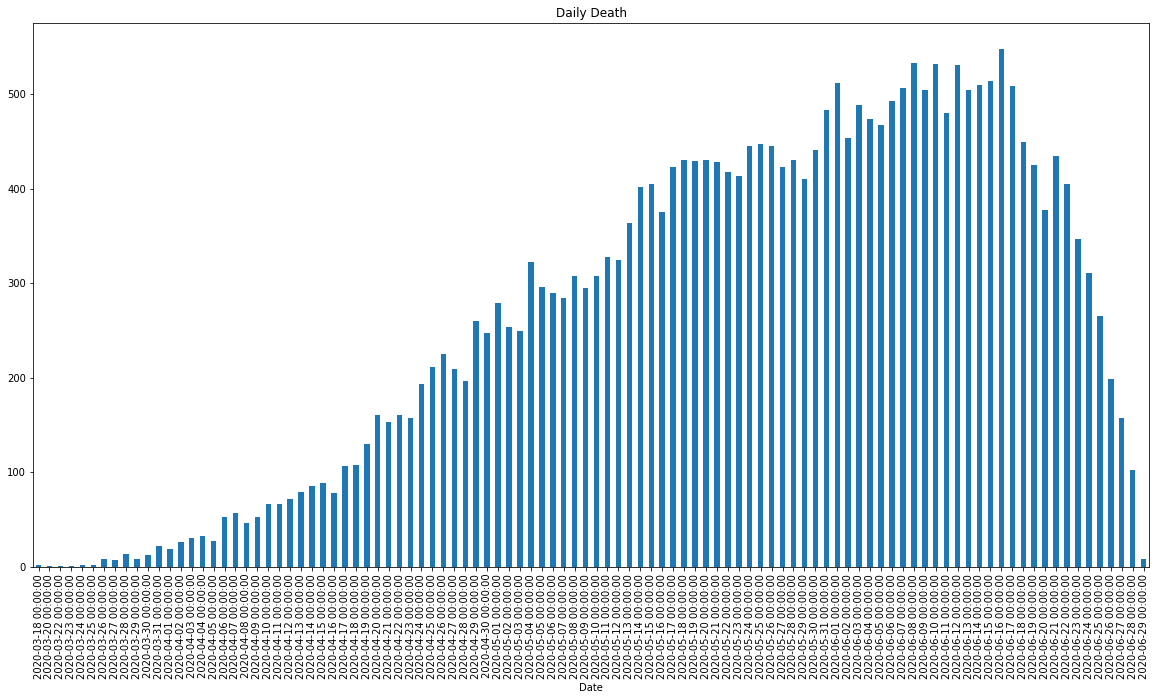

In [31]:
#4
q4=covidp.groupby('date_died')['date_died'].count().plot.bar( figsize=(20,10))
q4.set_xlabel('Date')
q4.set_title('Daily Death')
# q4.legend(['1','2'])
# plt.xlabel('Date')
# plt.title('Daily Death') #seaborn way is plt.title/ plt.xlabel

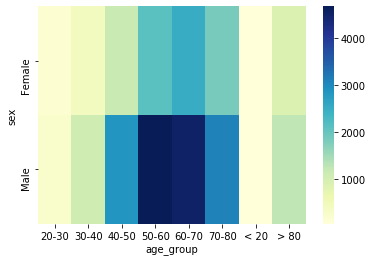

In [34]:
##5 doubt
heat_confirm = covidp.pivot_table('entry_date',index='sex',columns='age_group',aggfunc='count')

sns.heatmap(heat_confirm, cmap="YlGnBu")
# the largest confirmed case age group in males is 40-50 and 30-40 in females

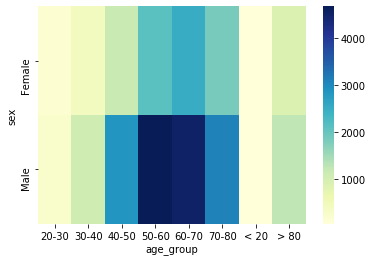

In [35]:
y = covidp.pivot_table(values='entry_date',columns='age_group',index='sex',aggfunc='count')

sns.heatmap(heat_death, cmap="YlGnBu")
# the age group with the most deaths is 50-60 in males and 60-70 in females

In [19]:
#6 doubt
mask = covidp['age']>=60
mask2 = covidp['age']<60
age_more=covidp[mask]
age_less=covidp[mask2]

Text(0.5, 0, 'Date')

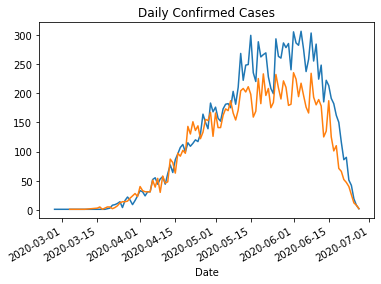

In [20]:
cx=age_more.groupby(age_more['entry_date'])['entry_date'].count()
dx=age_less.groupby(age_less['entry_date'])['entry_date'].count()
fx=cx.plot()
fx=dx.plot()
fx.set_title('Daily Confirmed Cases')
fx.set_xlabel('Date')

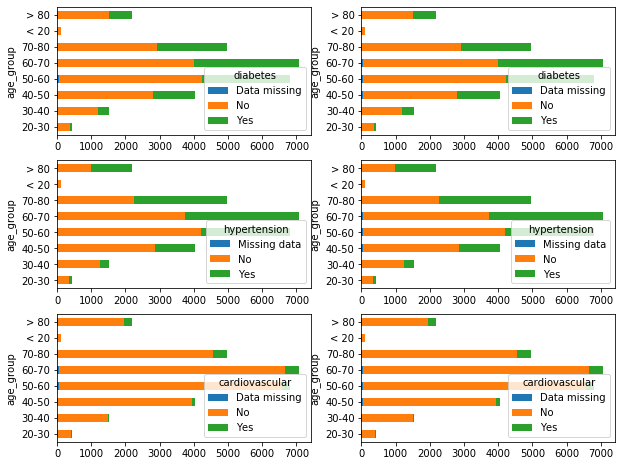

In [21]:
####7
fig , ax = plt.subplots(3,2, figsize=(10,8))
covidp.pivot_table(values='date_died', columns='diabetes', index='age_group', aggfunc='count').plot.barh(stacked=True, ax=ax[0,0])
covidp.pivot_table(values='date_died', columns='hypertension', index='age_group', aggfunc='count').plot.barh(stacked=True, ax=ax[1,0])
covidp.pivot_table(values='date_died', columns='cardiovascular', index='age_group', aggfunc='count').plot.barh(stacked=True, ax=ax[2,0])
covidp.pivot_table(values='entry_date', columns='diabetes', index='age_group', aggfunc='count').plot.barh(stacked=True,ax=ax[0,1])
covidp.pivot_table(values='entry_date', columns='hypertension', index='age_group', aggfunc='count').plot.barh(stacked=True,ax=ax[1,1])
covidp.pivot_table(values='entry_date', columns='cardiovascular', index='age_group', aggfunc='count').plot.barh(stacked=True,ax=ax[2,1])

In [22]:
#8
covidp['diff'] = (covidp['date_died'] - covidp['date_symptoms']).dt.days


In [23]:
covidp['diff'].dtypes


dtype('int64')

In [24]:
covidp.groupby('age_group')['diff'].mean().sort_values(ascending=True)


age_group
< 20      9.476190
> 80     10.149840
20-30    11.018957
70-80    11.099517
30-40    11.290301
40-50    11.715628
60-70    11.789041
50-60    11.936251
Name: diff, dtype: float64

In [25]:
#9
housing = pd.read_csv('USA_Housing.csv')
housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


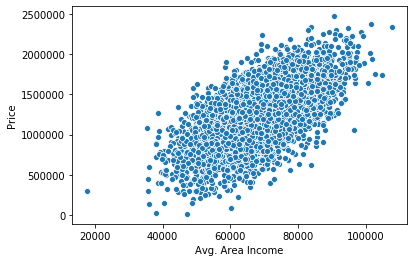

In [26]:
data = housing[['Avg. Area Income','Price']]
sns.scatterplot(x='Avg. Area Income', y='Price', data=data)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(housing[['Avg. Area Income','Price']])


In [28]:
kmeans.cluster_centers_

array([[  68519.18808535, 1229937.63135409],
       [  76968.46279861, 1664754.87609389],
       [  60145.49835734,  794643.73425279]])

In [29]:
kmeans.labels_


array([0, 1, 0, ..., 0, 0, 0])

In [30]:
# for index in range(len(labels)):
#     if labels[index]==0:
#         labels[index]='Rich Area'
#     elif labels[index]==1:
#           labels[index]='Higher Middle Class Area'
#     else:
#         labels[index] = 'Lower Middle Class Area'
 
for index in range(len(labels)):
    if labels[index]==0:
        labels[index]='Rich Area'
    elif labels[index]==1:
          labels[index]='Higher Middle Class Area'
    else:
        labels[index] = 'Lower Middle Class Area'
        
labels[:10]

NameError: name 'labels' is not defined

In [ ]:
housing['Area Class'] = labels


In [ ]:
housing.head(5)